In [87]:
import pandas as pd
import numpy as np
# Define format for floating-point numbers. Just to avoid numbers like 2.486000e+04
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns 
sns.set_theme(style="whitegrid")
palette="viridis"
from matplotlib import pyplot as plt


In [88]:
df = pd.read_csv("house_data_cleaned_sandown.csv")
df.head(3)

,url,name,Parking Spaces,Floor Size,Garden,Listing Number,Type of Property,Listing Date,Pets Allowed,Reception Rooms,Erf Size,Pool,price2,address,days_since_listing,Bedrooms2,Bathrooms2,Garages,Parking
0,https://www.property24.com/for-sale/sandown/bl...,1 Bedroom Apartment / Flat for Sale,1.00,41.00,No,114754122.00,Apartment / Flat,2024-08-05,Yes,0.00,41.00,Yes,1150000,Sandown,2,1.00,1.00,0.00,1.00
1,https://www.property24.com/for-sale/sandown/bl...,4 Bedroom House for Sale,4.00,272.00,Yes,112266844.00,House,2024-08-05,Yes,0.00,325.00,Yes,4850000,Sandown,2,4.00,3.00,2.00,2.00
2,https://www.property24.com/for-sale/sandown/bl...,3 Bedroom Apartment / Flat for Sale,2.00,109.00,No,114731356.00,Apartment / Flat,2024-07-30,Yes,0.00,109.00,Yes,2080000,Sandown,8,3.00,2.00,0.00,2.00


In [89]:
df.columns

Index(['url', 'name', 'Parking Spaces', 'Floor Size', 'Garden',
       'Listing Number', 'Type of Property', 'Listing Date', 'Pets Allowed',
       'Reception Rooms', 'Erf Size', 'Pool', 'price2', 'address',
       'days_since_listing', 'Bedrooms2', 'Bathrooms2', 'Garages', 'Parking'],
      dtype='object')

In [90]:
# Let's deal with prices in thousands
df.price2 = df.price2/1000

In [91]:
## let's remove the attributes we wont be using
df.drop(["url", "name", "Listing Number", "Listing Date"], axis=1, inplace=True)

In [92]:
df.head()

,Parking Spaces,Floor Size,Garden,Type of Property,Pets Allowed,Reception Rooms,Erf Size,Pool,price2,address,days_since_listing,Bedrooms2,Bathrooms2,Garages,Parking
0,1.00,41.00,No,Apartment / Flat,Yes,0.00,41.00,Yes,1150.00,Sandown,2,1.00,1.00,0.00,1.00
1,4.00,272.00,Yes,House,Yes,0.00,325.00,Yes,4850.00,Sandown,2,4.00,3.00,2.00,2.00
2,2.00,109.00,No,Apartment / Flat,Yes,0.00,109.00,Yes,2080.00,Sandown,8,3.00,2.00,0.00,2.00
3,2.00,113.00,No,Apartment / Flat,Yes,0.00,113.00,No,1879.50,Sandown,5,3.00,2.00,1.00,1.00
4,2.00,307.00,Yes,House,Yes,0.00,450.00,Yes,5350.00,Sandown,5,4.00,4.00,2.00,0.00


In [93]:
df.shape

(565, 15)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Parking Spaces      565 non-null    float64
 1   Floor Size          481 non-null    float64
 2   Garden              565 non-null    object 
 3   Type of Property    565 non-null    object 
 4   Pets Allowed        431 non-null    object 
 5   Reception Rooms     565 non-null    float64
 6   Erf Size            387 non-null    float64
 7   Pool                565 non-null    object 
 8   price2              565 non-null    float64
 9   address             565 non-null    object 
 10  days_since_listing  565 non-null    int64  
 11  Bedrooms2           556 non-null    float64
 12  Bathrooms2          555 non-null    float64
 13  Garages             565 non-null    float64
 14  Parking             565 non-null    float64
dtypes: float64(9), int64(1), object(5)
memory usage: 66.3+ KB

In [95]:
df.isnull().sum().sort_values(ascending=False)

Erf Size              178
Pets Allowed          134
Floor Size             84
Bathrooms2             10
Bedrooms2               9
Parking Spaces          0
Garden                  0
Type of Property        0
Reception Rooms         0
Pool                    0
price2                  0
address                 0
days_since_listing      0
Garages                 0
Parking                 0
dtype: int64

In [96]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Parking Spaces,565.00,NaN,NaN,NaN,2.58,1.47,0.00,1.00,2.00,4.00,12.00
Floor Size,481.00,NaN,NaN,NaN,174.32,68.16,24.00,118.00,175.00,227.00,365.00
Garden,565,2,Yes,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type of Property,565,3,House,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pets Allowed,431,2,Yes,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reception Rooms,565.00,NaN,NaN,NaN,0.63,0.90,0.00,0.00,0.00,2.00,3.00
Erf Size,387.00,NaN,NaN,NaN,663.60,3687.98,38.00,250.00,250.00,325.00,63716.00
Pool,565,2,No,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price2,565.00,NaN,NaN,NaN,3134.45,1145.80,719.90,2131.50,3149.00,3995.00,6500.00
address,565,1,Sandown,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
non_numeric_cols = df.columns[df.dtypes=="object"]
non_numeric_cols

Index(['Garden', 'Type of Property', 'Pets Allowed', 'Pool', 'address'], dtype='object')

In [98]:

def plot_categores(col,top=10, truncate=True):
    # Create the count plot
    plt.figure(figsize=(12, 6))

    data = df[col].value_counts(dropna=False).reset_index().sort_values(by="count", ascending=False).fillna("null")
    if len(data)>top and truncate:
        print("More than 10 categories found. Data truncated.")
        data = data.head(top)

    ax = sns.barplot(data, x=col, y="count", color="lightblue", order=data[col], edgecolor='w')

    # Add labels and title
    ax.set_xlabel(f"{col}", fontsize=12)
    ax.set_ylabel("Freq", fontsize=12)
    ax.set_title(f"Count of {col}", fontsize=14)

    # Annotate bars with count values
    for p in ax.patches:
        ax.annotate(format(int(p.get_height())), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    # Show plot
    plt.tight_layout()
    plt.show()
    return data.to_dict(orient="records")

More than 10 categories found. Data truncated.


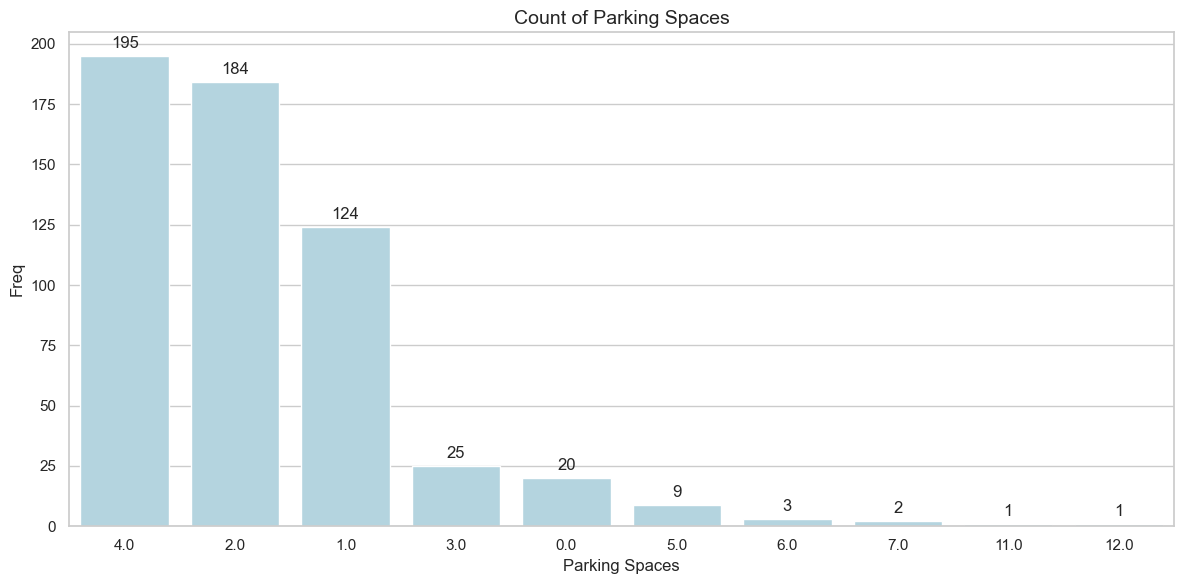

[{'Parking Spaces': 4.0, 'count': 195}, {'Parking Spaces': 2.0, 'count': 184}, {'Parking Spaces': 1.0, 'count': 124}, {'Parking Spaces': 3.0, 'count': 25}, {'Parking Spaces': 0.0, 'count': 20}, {'Parking Spaces': 5.0, 'count': 9}, {'Parking Spaces': 6.0, 'count': 3}, {'Parking Spaces': 7.0, 'count': 2}, {'Parking Spaces': 11.0, 'count': 1}, {'Parking Spaces': 12.0, 'count': 1}]


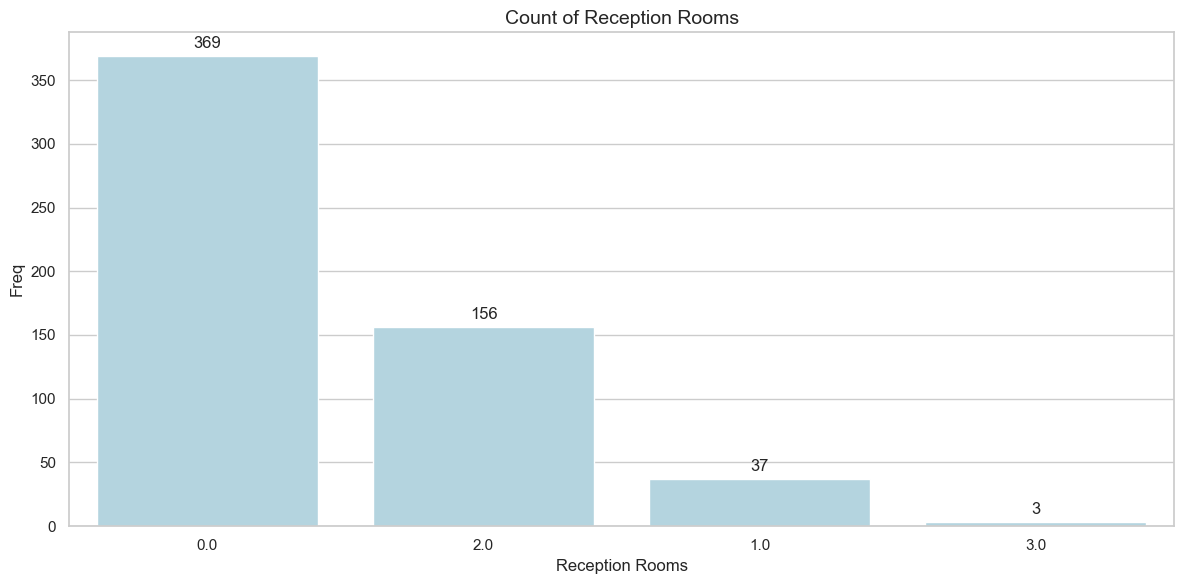

[{'Reception Rooms': 0.0, 'count': 369}, {'Reception Rooms': 2.0, 'count': 156}, {'Reception Rooms': 1.0, 'count': 37}, {'Reception Rooms': 3.0, 'count': 3}]


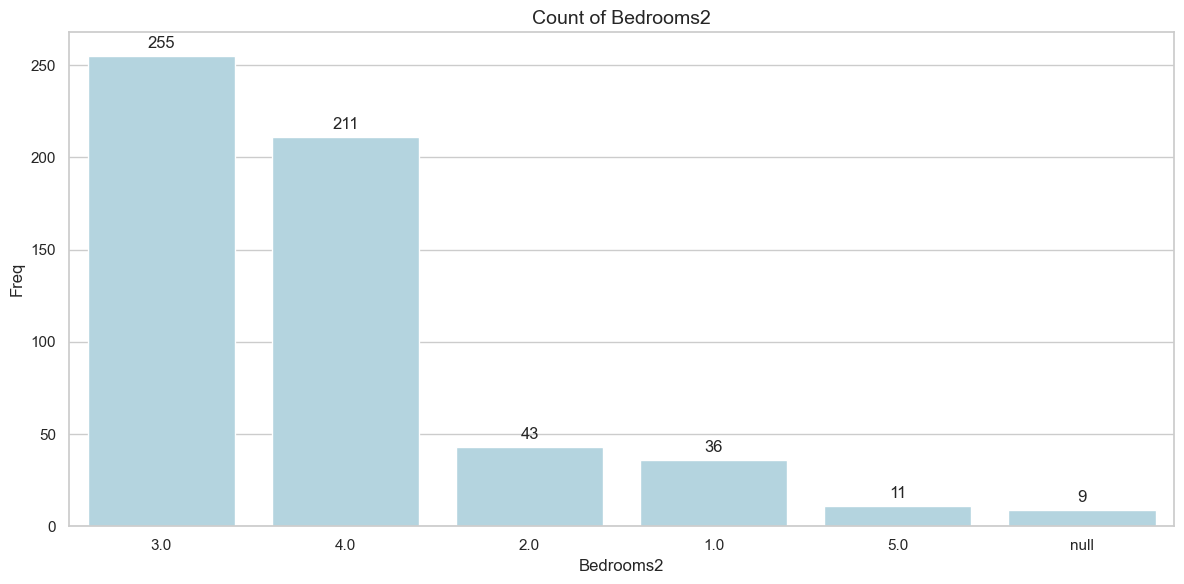

[{'Bedrooms2': 3.0, 'count': 255}, {'Bedrooms2': 4.0, 'count': 211}, {'Bedrooms2': 2.0, 'count': 43}, {'Bedrooms2': 1.0, 'count': 36}, {'Bedrooms2': 5.0, 'count': 11}, {'Bedrooms2': 'null', 'count': 9}]


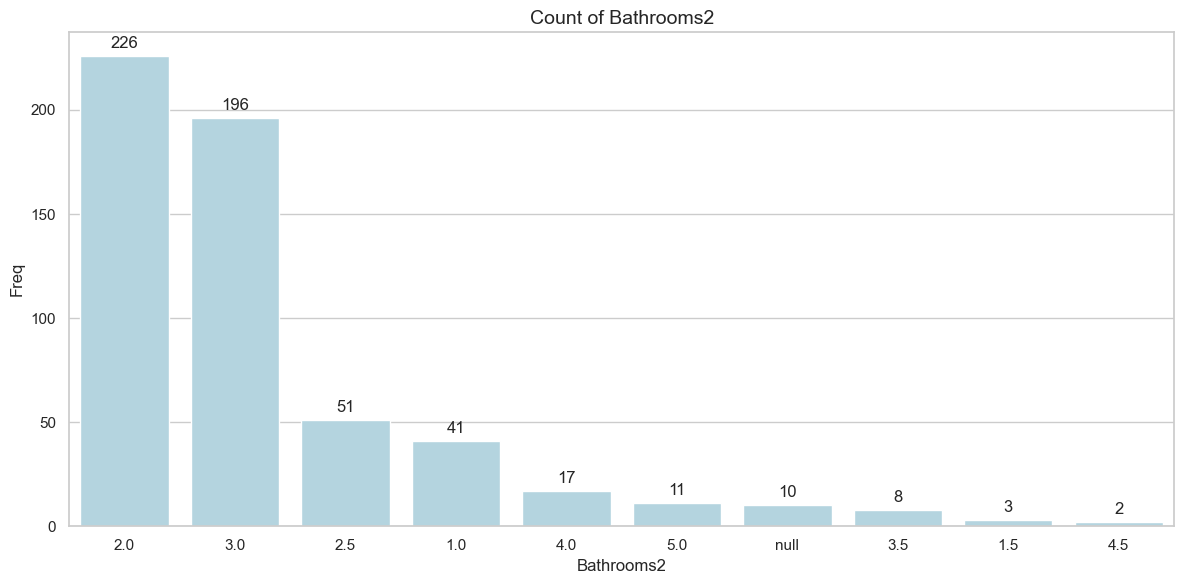

[{'Bathrooms2': 2.0, 'count': 226}, {'Bathrooms2': 3.0, 'count': 196}, {'Bathrooms2': 2.5, 'count': 51}, {'Bathrooms2': 1.0, 'count': 41}, {'Bathrooms2': 4.0, 'count': 17}, {'Bathrooms2': 5.0, 'count': 11}, {'Bathrooms2': 'null', 'count': 10}, {'Bathrooms2': 3.5, 'count': 8}, {'Bathrooms2': 1.5, 'count': 3}, {'Bathrooms2': 4.5, 'count': 2}]


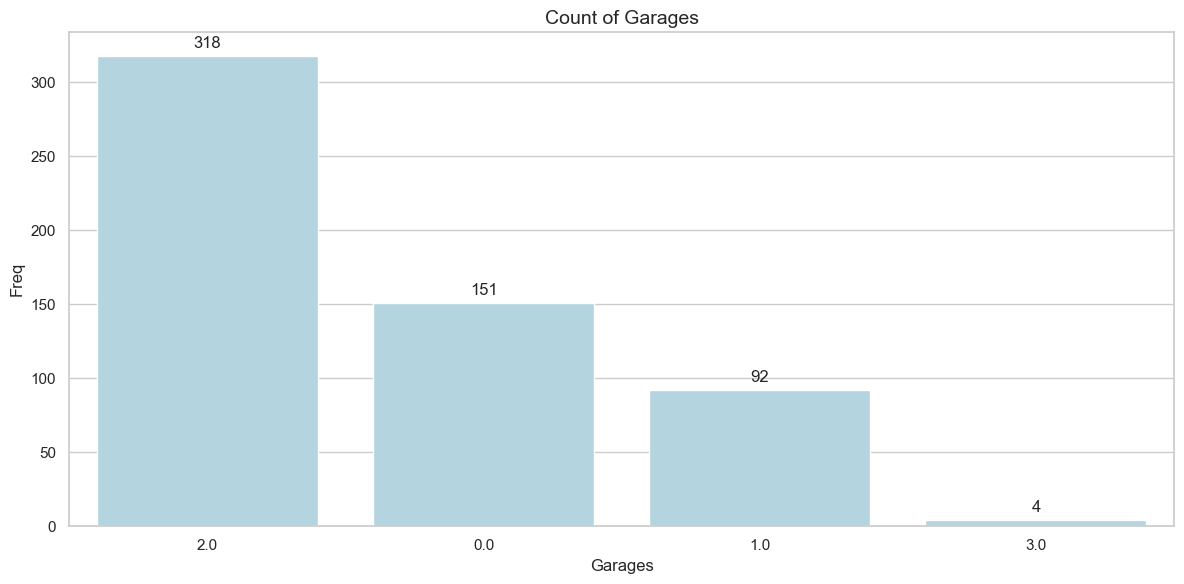

[{'Garages': 2.0, 'count': 318}, {'Garages': 0.0, 'count': 151}, {'Garages': 1.0, 'count': 92}, {'Garages': 3.0, 'count': 4}]


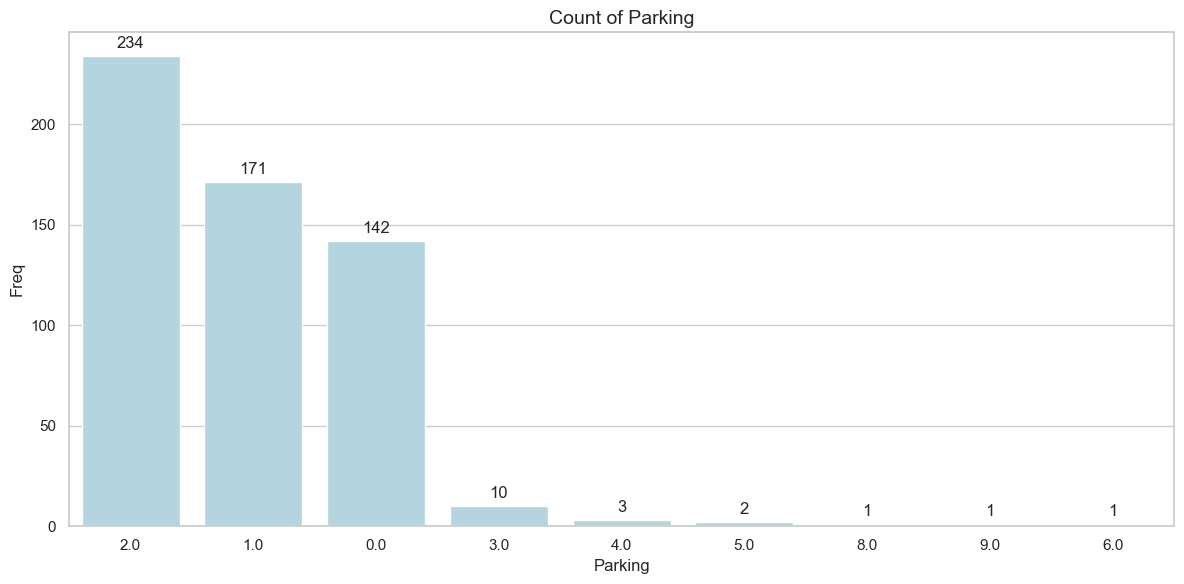

[{'Parking': 2.0, 'count': 234}, {'Parking': 1.0, 'count': 171}, {'Parking': 0.0, 'count': 142}, {'Parking': 3.0, 'count': 10}, {'Parking': 4.0, 'count': 3}, {'Parking': 5.0, 'count': 2}, {'Parking': 8.0, 'count': 1}, {'Parking': 9.0, 'count': 1}, {'Parking': 6.0, 'count': 1}]


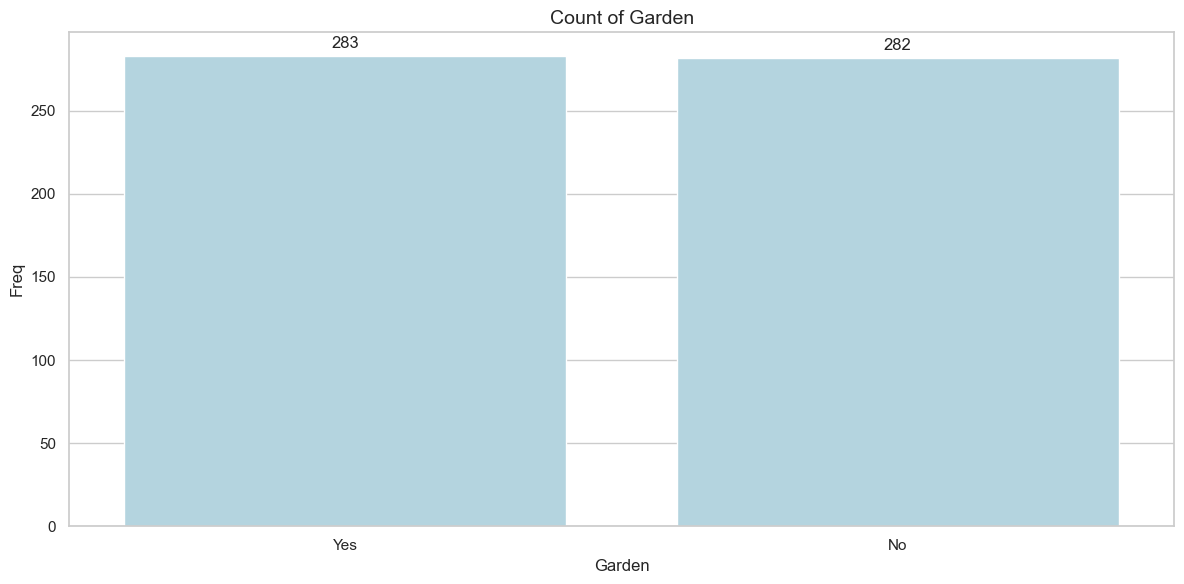

[{'Garden': 'Yes', 'count': 283}, {'Garden': 'No', 'count': 282}]


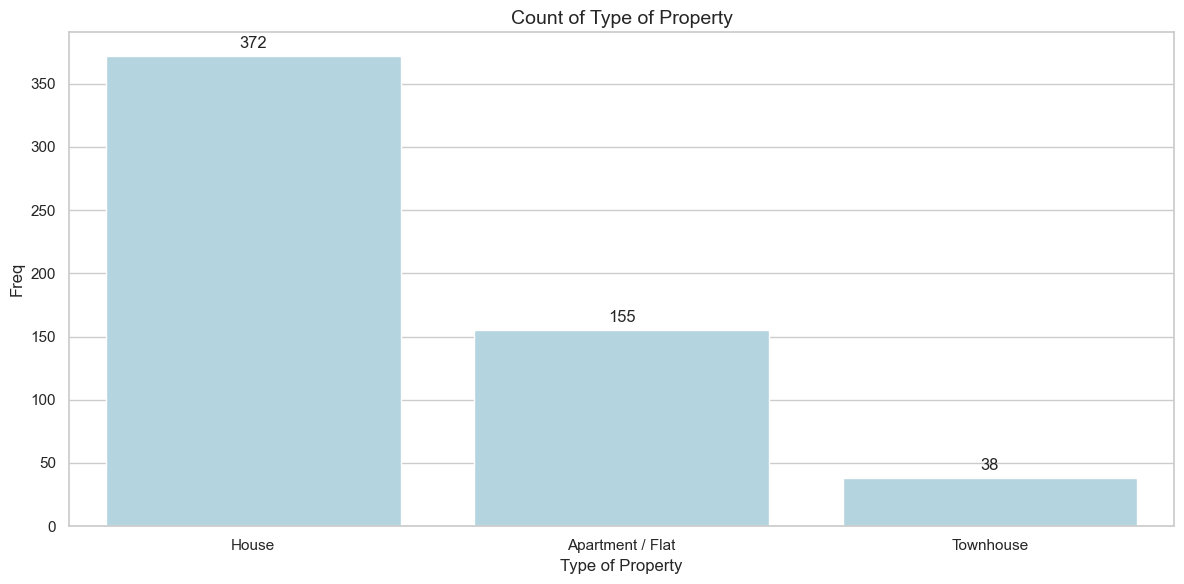

[{'Type of Property': 'House', 'count': 372}, {'Type of Property': 'Apartment / Flat', 'count': 155}, {'Type of Property': 'Townhouse', 'count': 38}]


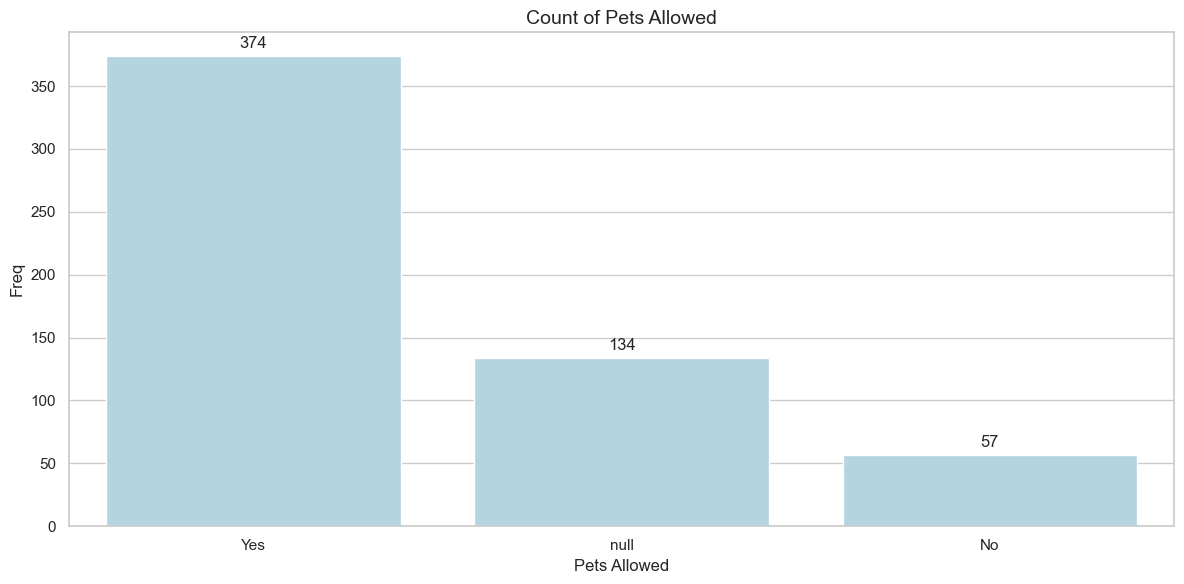

[{'Pets Allowed': 'Yes', 'count': 374}, {'Pets Allowed': 'null', 'count': 134}, {'Pets Allowed': 'No', 'count': 57}]


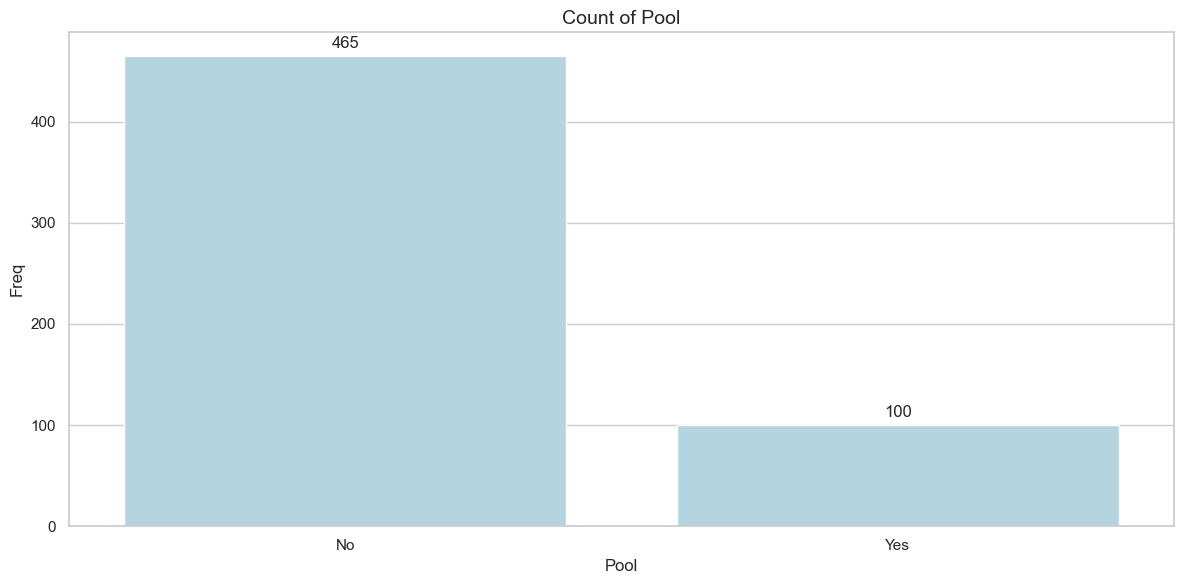

[{'Pool': 'No', 'count': 465}, {'Pool': 'Yes', 'count': 100}]


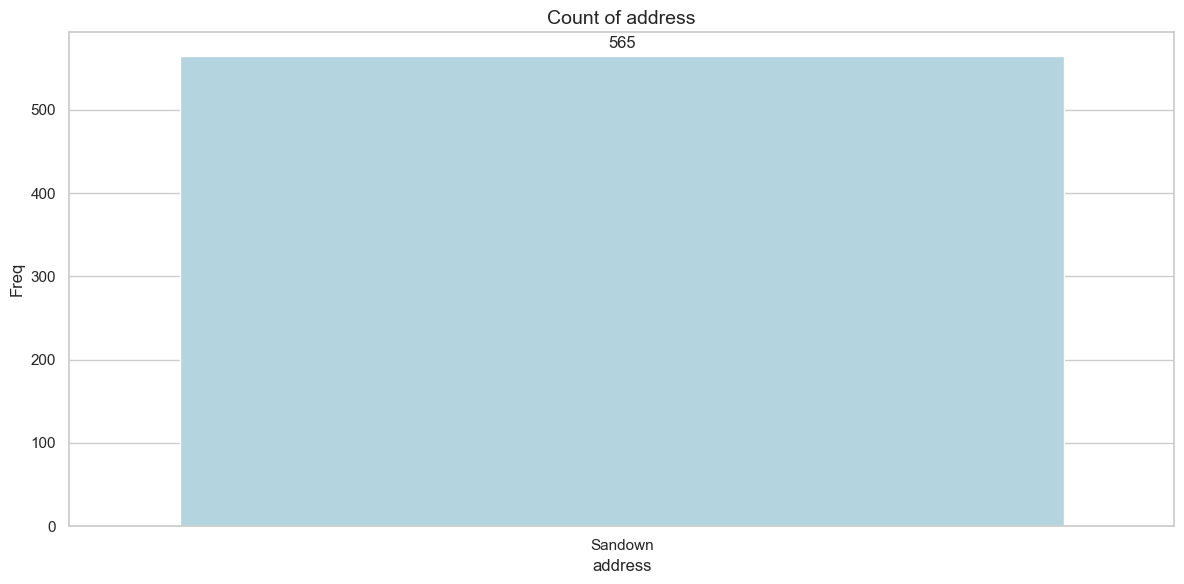

[{'address': 'Sandown', 'count': 565}]


In [99]:
cols = ['Parking Spaces', "Reception Rooms", 'Bedrooms2', 'Bathrooms2', 'Garages',
       'Parking','Garden', 'Type of Property', 'Pets Allowed', 'Pool', 'address']
for col in cols:
    data = plot_categores(col)
    print(data)

In [100]:
df.columns

Index(['Parking Spaces', 'Floor Size', 'Garden', 'Type of Property',
       'Pets Allowed', 'Reception Rooms', 'Erf Size', 'Pool', 'price2',
       'address', 'days_since_listing', 'Bedrooms2', 'Bathrooms2', 'Garages',
       'Parking'],
      dtype='object')

In [101]:
numeric_cols = ['Parking Spaces', 'Floor Size', 'Reception Rooms', 'Erf Size', 'price2',
       'Bedrooms2', 'Bathrooms2', 'Garages', 'Parking']

<Axes: >

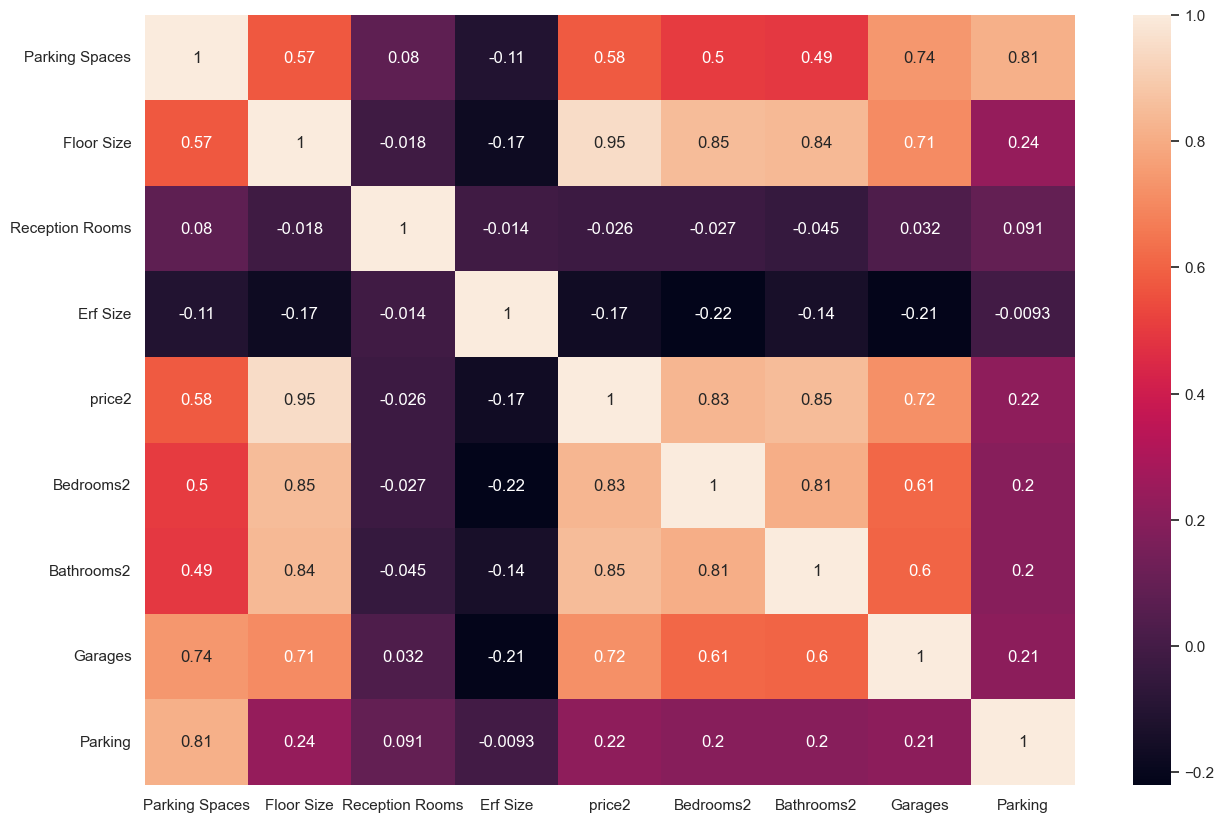

In [102]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numeric_cols].corr(), annot=True)

In [103]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ 
    
    Boxplot and histogram combined + summary statistics
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    
    """
    # Summary stats
    min_val = np.min(feature)
    max_val = np.max(feature)
    mean_val = np.mean(feature)
    median_val = np.median(feature)
    q25 = np.percentile(feature, 25)
    q75 = np.percentile(feature, 75)
    iqr = q75 - q25
    range_val = max_val - min_val
    
    stats = {
        'min': min_val,
        'max': max_val,
        'mean': mean_val,
        'median': median_val,
        '25th percentile': q25,
        '75th percentile': q75,
        'IQR': iqr,
        'range': range_val
    }

    sns.set_context(font_scale=1.5) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='green', orient="h") # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.histplot(feature, kde=False, ax=ax_hist2, color="lightblue") # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    return stats

{'min': np.float64(719.9),
 'max': np.float64(6500.0),
 'mean': np.float64(3134.451123893805),
 'median': np.float64(3149.0),
 '25th percentile': np.float64(2131.5),
 '75th percentile': np.float64(3995.0),
 'IQR': np.float64(1863.5),
 'range': np.float64(5780.1)}

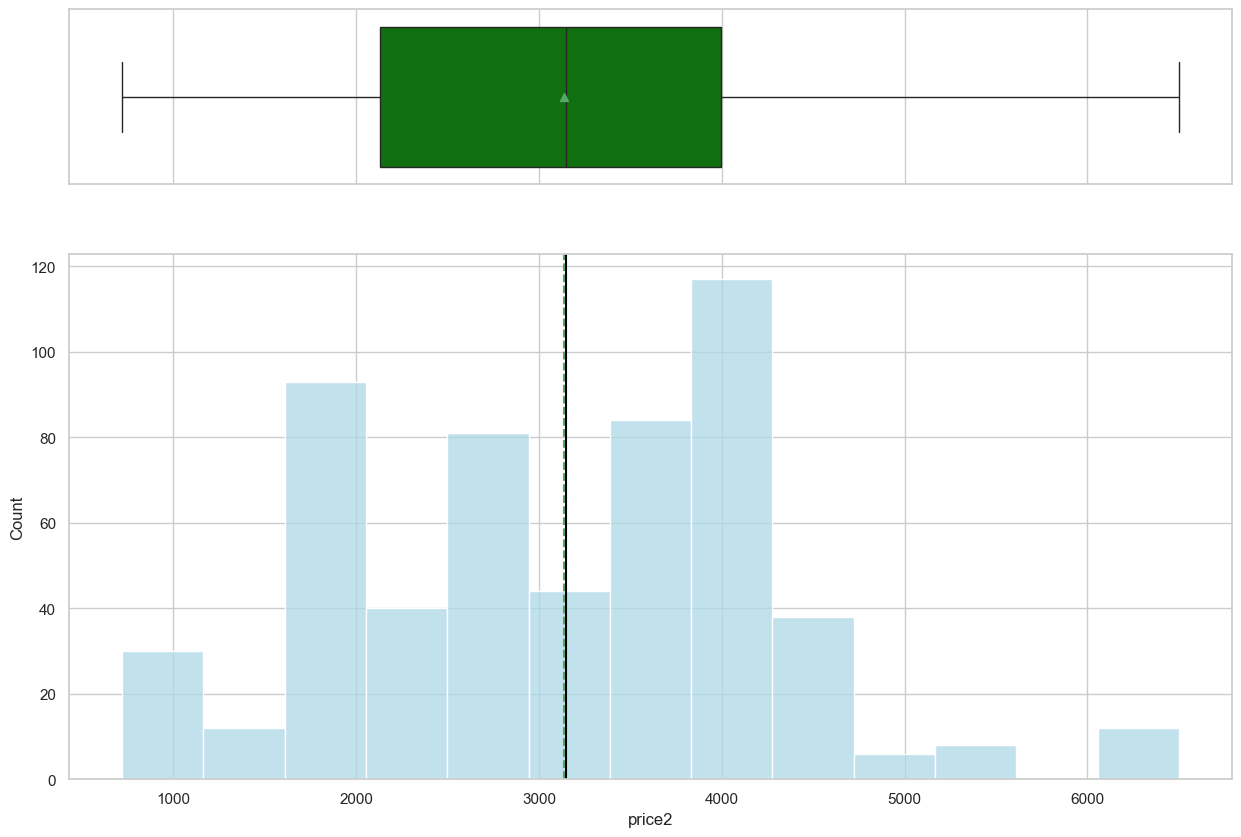

In [107]:
histogram_boxplot(df.price2)

{'min': np.int64(2),
 'max': np.int64(798),
 'mean': np.float64(124.68318584070796),
 'median': np.float64(84.0),
 '25th percentile': np.float64(39.0),
 '75th percentile': np.float64(162.0),
 'IQR': np.float64(123.0),
 'range': np.int64(796)}

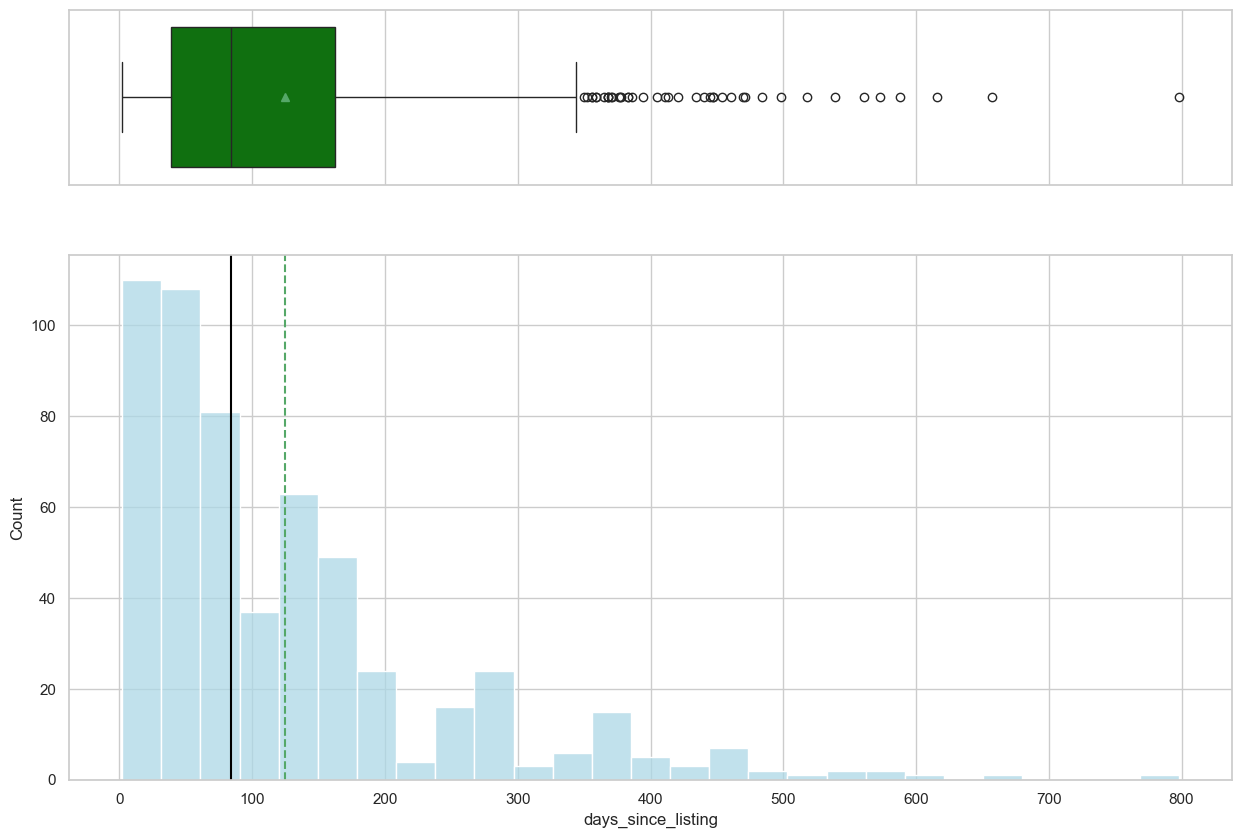

In [108]:
# sns.scatterplot(data=df, x="Erf")

histogram_boxplot(df.days_since_listing)

In [106]:
df.columns

Index(['Parking Spaces', 'Floor Size', 'Garden', 'Type of Property',
       'Pets Allowed', 'Reception Rooms', 'Erf Size', 'Pool', 'price2',
       'address', 'days_since_listing', 'Bedrooms2', 'Bathrooms2', 'Garages',
       'Parking'],
      dtype='object')

In [19]:

# df = df[df["Type of Property"]=="House"]
# df["bedbath"] = df["Bedrooms2"]+df["Bathrooms2"]
# df["flooref"] = df["Floor Size"] * df["Erf Size"]

df = df.drop(["address", "days_since_listing", "Parking Spaces", 'Garages', "Erf Size"], axis=1)

In [20]:
df.head()

,Floor Size,Garden,Type of Property,Pets Allowed,Reception Rooms,Pool,price2,Bedrooms2,Bathrooms2,Parking
0,41.00,No,Apartment / Flat,Yes,0.00,Yes,1150000,1.00,1.00,1.00
1,272.00,Yes,House,Yes,0.00,Yes,4850000,4.00,3.00,2.00
2,109.00,No,Apartment / Flat,Yes,0.00,Yes,2080000,3.00,2.00,2.00
3,113.00,No,Apartment / Flat,Yes,0.00,No,1879500,3.00,2.00,1.00
4,307.00,Yes,House,Yes,0.00,Yes,5350000,4.00,4.00,0.00


In [21]:
df = df.dropna().reset_index(drop=True)

In [22]:
df.shape

(391, 10)

In [23]:
df.head()

,Floor Size,Garden,Type of Property,Pets Allowed,Reception Rooms,Pool,price2,Bedrooms2,Bathrooms2,Parking
0,41.00,No,Apartment / Flat,Yes,0.00,Yes,1150.00,1.00,1.00,1.00
1,272.00,Yes,House,Yes,0.00,Yes,4850.00,4.00,3.00,2.00
2,109.00,No,Apartment / Flat,Yes,0.00,Yes,2080.00,3.00,2.00,2.00
3,113.00,No,Apartment / Flat,Yes,0.00,No,1879.50,3.00,2.00,1.00
4,307.00,Yes,House,Yes,0.00,Yes,5350.00,4.00,4.00,0.00


In [24]:
df.columns

Index(['Floor Size', 'Garden', 'Type of Property', 'Pets Allowed',
       'Reception Rooms', 'Pool', 'price2', 'Bedrooms2', 'Bathrooms2',
       'Parking'],
      dtype='object')

In [25]:
df2 = pd.get_dummies(df, columns=["Type of Property", "Pool", "Garden", "Pets Allowed",], drop_first=True)

In [26]:
# df2
# df2=df
df2.head()

,Floor Size,Reception Rooms,price2,Bedrooms2,Bathrooms2,Parking,Type of Property_House,Type of Property_Townhouse,Pool_Yes,Garden_Yes,Pets Allowed_Yes
0,41.00,0.00,1150.00,1.00,1.00,1.00,False,False,True,False,True
1,272.00,0.00,4850.00,4.00,3.00,2.00,True,False,True,True,True
2,109.00,0.00,2080.00,3.00,2.00,2.00,False,False,True,False,True
3,113.00,0.00,1879.50,3.00,2.00,1.00,False,False,False,False,True
4,307.00,0.00,5350.00,4.00,4.00,0.00,True,False,True,True,True


In [27]:
# lets build our linear model
# independant variables
X = df2.drop(['price2'], axis=1)
# the dependent variable
y = df2[['price2']]

In [28]:
print("Mean prices: ", y.mean())
print("Median prices: ", y.median())

Mean prices:  price2   3161.83
dtype: float64
Median prices:  price2   3200.00
dtype: float64


# Modelling

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler

In [30]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train, y_test = np.array(y_train).ravel(), y_test

In [31]:
# We will store results from each of the model here.
all_results = []

## 1. Linear regression model

In [32]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3190.8113479853478


In [33]:
# for idx, col_name in enumerate(X_train.columns):
#     print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [34]:
# y_true = y_test["price2"]
# pd.DataFrame({"y_true": y_true.to_list(), "y_pred": y_pred.ravel()})

In [35]:
y_pred_test = regression_model.predict(X_test)
y_pred_train = regression_model.predict(X_train)

results = {
    "model": "LinearRegression",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

In [36]:
results

{'model': 'LinearRegression',
 'r2_test': 0.9322297348168077,
 'r2_train': 0.9160872027170253,
 'mae_test': np.float64(206.85705346331483),
 'mae_train': np.float64(221.78468007017472),
 'mse_test': np.float64(82194.84167664408),
 'mse_train': np.float64(105127.43091738636)}

## 2. Ridge Regression

In [37]:
# Initialize Ridge model
ridge = Ridge(alpha=10)  # alpha is the regularization strength

# Fit the model
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge}')

Ridge Regression MSE: 81753.06340113831


In [38]:
y_pred_test = ridge.predict(X_test)
y_pred_train = ridge.predict(X_train)

results = {
    "model": "Ridge Regression",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

In [39]:
results

{'model': 'Ridge Regression',
 'r2_test': 0.9299220419481867,
 'r2_train': 0.9122504398266492,
 'mae_test': np.float64(210.39127132152902),
 'mae_train': np.float64(227.77210217803244),
 'mse_test': np.float64(81753.06340113831),
 'mse_train': np.float64(106623.91693159028)}

In [40]:
# y_pred = ridge.predict(X_test)
# y_true = y_test["price2"]
# pd.DataFrame({"y_true": y_true.to_list(), "y_pred": y_pred.ravel()})

## 3. Laso Regression

In [41]:
# Initialize Lasso model
lasso = Lasso(alpha=10)  # alpha is the regularization strength

# Fit the model
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mse_lasso}')

Lasso Regression MSE: 84946.97965996167


In [42]:
y_pred_test = lasso.predict(X_test)
y_pred_train = lasso.predict(X_train)

results = {
    "model": "Lasso Regression",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

In [43]:
# y_pred = ridge.predict(X_test)
# y_true = y_test["price2"]
# pd.DataFrame({"y_true": y_true.to_list(), "y_pred": y_pred.ravel()}).to_dict(orient="records")

## 4. Polynomial Regression

In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Polynomial features transformation (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Fit the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)


LinearRegression()

In [45]:
y_pred_test = poly_model.predict(X_test_poly)
y_pred_train = poly_model.predict(X_train_poly)

results = {
    "model": "Polynomial Regression (Degree=2)",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

In [46]:
results

{'model': 'Polynomial Regression (Degree=2)',
 'r2_test': 0.8691763166841326,
 'r2_train': 0.9249825376729269,
 'mae_test': np.float64(282.49971373477223),
 'mae_train': np.float64(234.38866400526555),
 'mse_test': np.float64(171582.4571064029),
 'mse_train': np.float64(101747.00848365463)}

In [47]:
# y_pred_poly = poly.predict(X_test_poly)
# y_true_poly = y_test_poly["price2"]
# pd.DataFrame({"y_true": y_true_poly.to_list(), "y_pred": y_pred_poly.ravel()}).to_dict(orient="records")

## 5. Decision Trees

In [48]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# # Sample data
# X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
# y = np.array([1.5, 3.7, 2.8, 5.5, 7.8])

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

y_pred_test = tree_reg.predict(X_test)
y_pred_train = tree_reg.predict(X_train)

results = {
    "model": "Decision Tree Regressor",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

In [49]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    "max_depth": [None, 2, 3, 4, 5],          # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],         # Minimum number of samples required to split an internal node
    "min_samples_leaf": [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    "criterion": ["squared_error", "friedman_mse", "absolute_error"],  # Function to measure the quality of a split
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=tree_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Predict using the best estimator
best_model = grid_search.best_estimator_


y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


results = {
    "model": "Decision Tree Regressor (Tuned)",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

Best parameters found:  {'criterion': 'absolute_error', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10}


## 6. Random Fores

In [50]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Fit the model
forest_reg = RandomForestRegressor(n_estimators=150, random_state=42)
forest_reg.fit(X_train, np.array(y_train).ravel())

# Predict and evaluate
y_pred = forest_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression MSE: {mse:.2f}")
print(f"Random Forest Regression R²: {r2:.2f}")


y_pred_test = forest_reg.predict(X_test)
y_pred_train = forest_reg.predict(X_train)


results = {
    "model": "Random Forest Regressor",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

Random Forest Regression MSE: 67846.73
Random Forest Regression R²: 0.95


In [51]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
forest_reg = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],          # Number of trees in the forest
    "max_depth": [None, 3, 5, 7],            # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],         # Minimum number of samples required to split an internal node
    "min_samples_leaf": [1, 2, 4],           # Minimum number of samples required to be at a leaf node
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
grid_search.fit(X_train, np.array(y_train).ravel())

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Predict using the best estimator
best_model = grid_search.best_estimator_

y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

results = {
    "model": "Random Forest Regressor (Tuned)",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## 7. Adaptive Boosting (Adaboost)

In [52]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Initialize the base regressor and AdaBoost Regressor
base_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
ada_reg = AdaBoostRegressor(estimator=base_reg, n_estimators=100, random_state=42)

# Fit the model
ada_reg.fit(X_train, np.array(y_train).ravel())


y_pred_test = ada_reg.predict(X_test)
y_pred_train = ada_reg.predict(X_train)

results = {
    "model": "AdaBoost (with Decision Trees)",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)


## 8. XGBooosting

Known issue on Mac when working with XGBoost: You are running 32-bit Python on a 64-bit OS

Solution: Run the following command

brew install libomp

In [53]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Initialize the XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
xgb_reg.fit(X_train, np.array(y_train).ravel())

y_pred_test = xgb_reg.predict(X_test)
y_pred_train = xgb_reg.predict(X_train)

results = {
    "model": "XGBoost Regressor",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

In [54]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the XGBoost Regressor
xgb_reg = XGBRegressor(random_state=42)

# Define the parameter grid
# param_grid = {
#     "n_estimators": [50, 100, 200],
#     "learning_rate": [0.01, 0.1, 0.2],
#     "max_depth": [3, 5, 7],
#     "min_child_weight": [1, 3, 5],
#     "subsample": [0.6, 0.8, 1.0],
#     "colsample_bytree": [0.6, 0.8, 1.0],
#     "gamma": [0, 0.1, 0.2],
#     "reg_alpha": [0, 0.01, 0.1],
#     "reg_lambda": [1, 1.5, 2],
# }

# # Perform Grid Search with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
# grid_search.fit(X_train, np.array(y_train).ravel())

# Best parameters from grid search
best_params = {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 0.6}
print("Best parameters found: ", best_params)

# Predict using the best estimator
best_model = grid_search.best_estimator_


y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

results = {
    "model": "XGBoost Regressor (Tuned)",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

Best parameters found:  {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 0.6}


In [109]:
results_df = pd.DataFrame(all_results)
results_df["rmse_train"] = np.sqrt(results_df["mse_train"])
results_df["rmse_test"] = np.sqrt(results_df["mse_test"])
results_df.to_csv("results.csv")

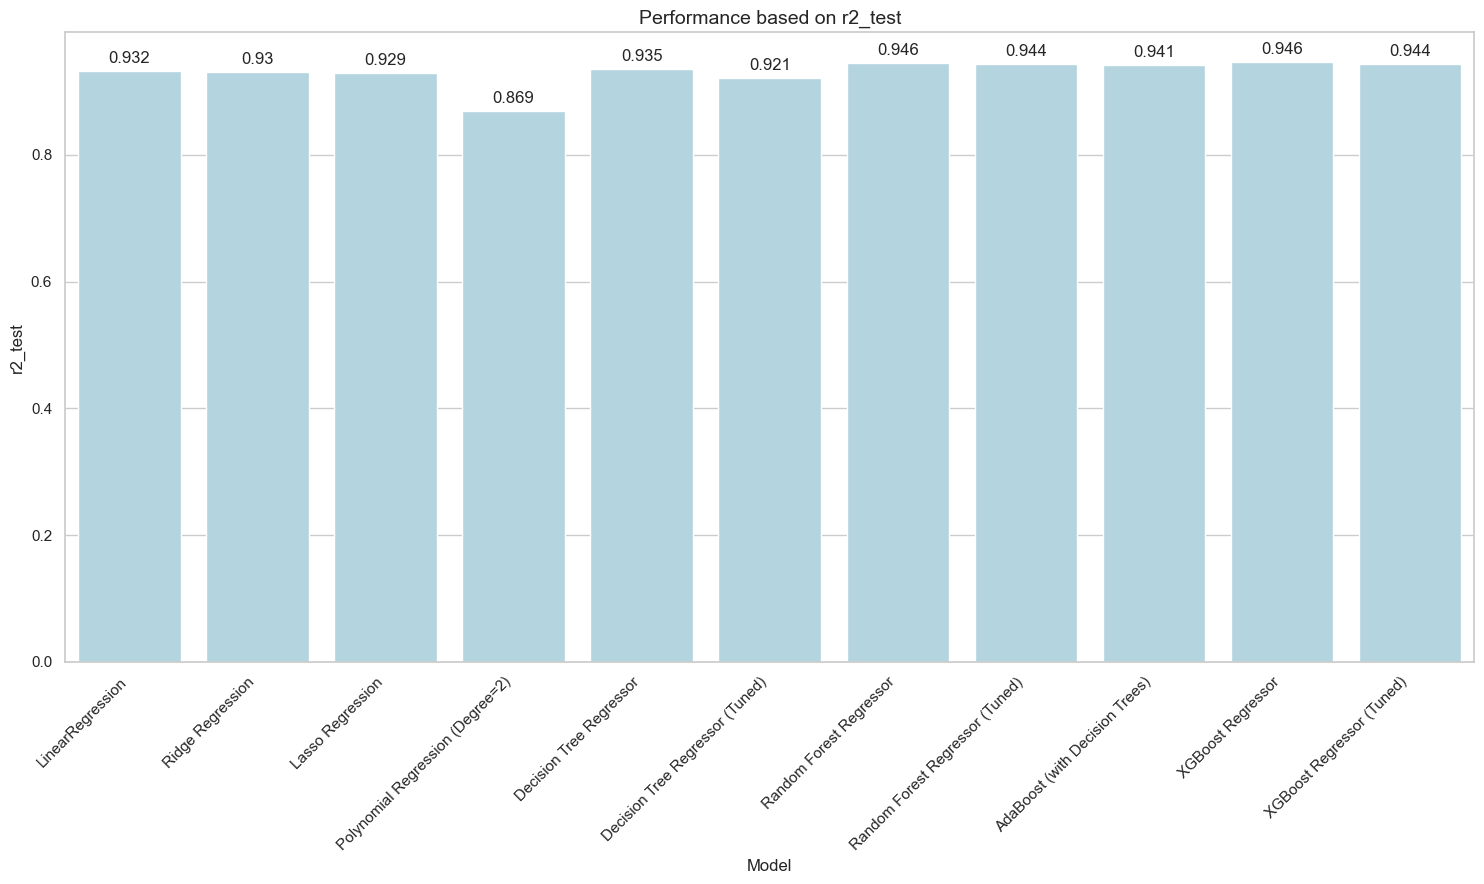

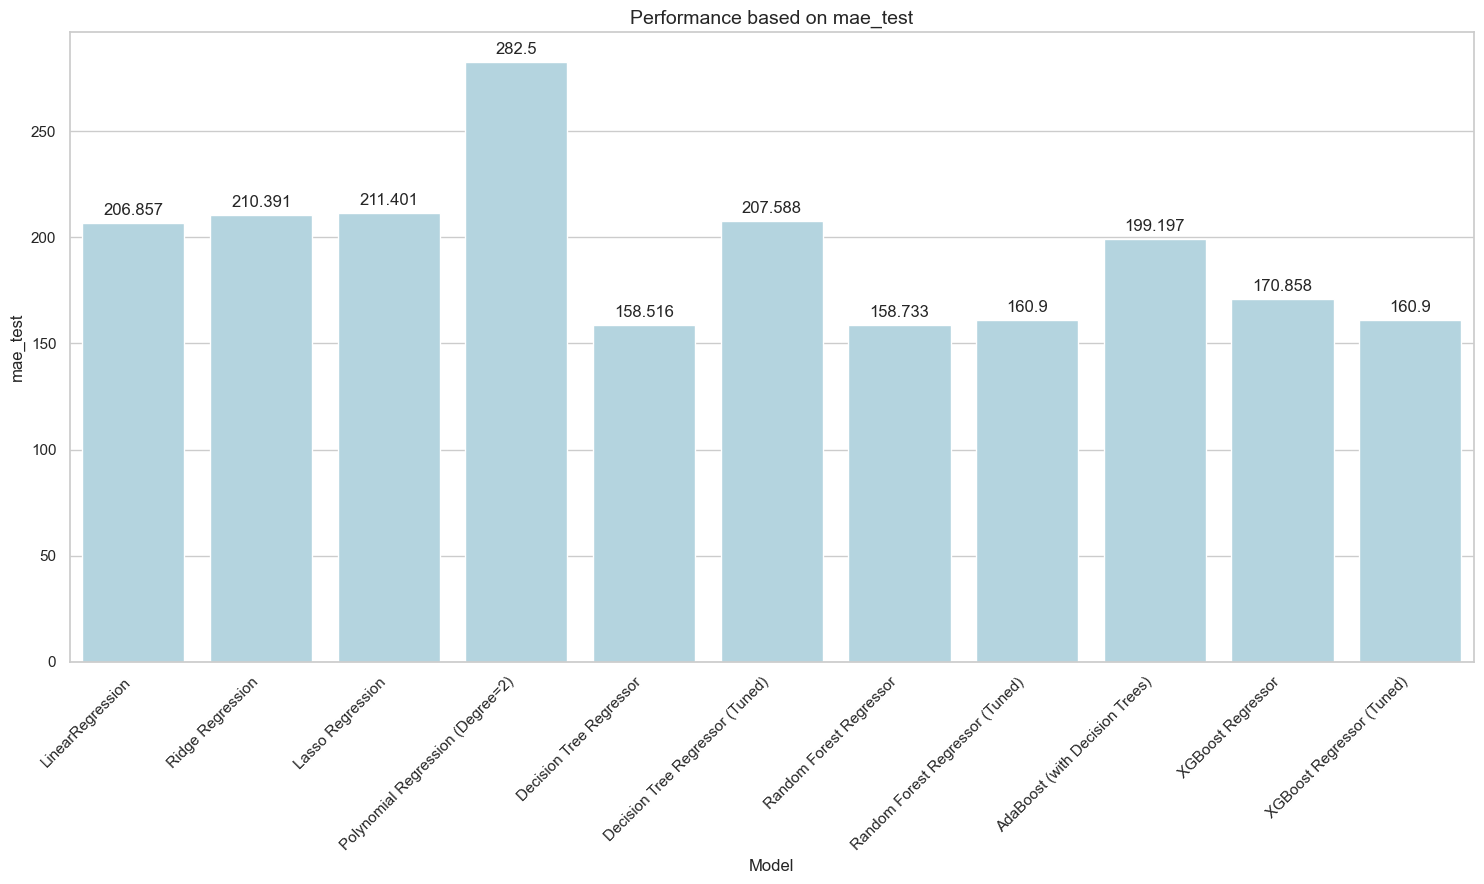

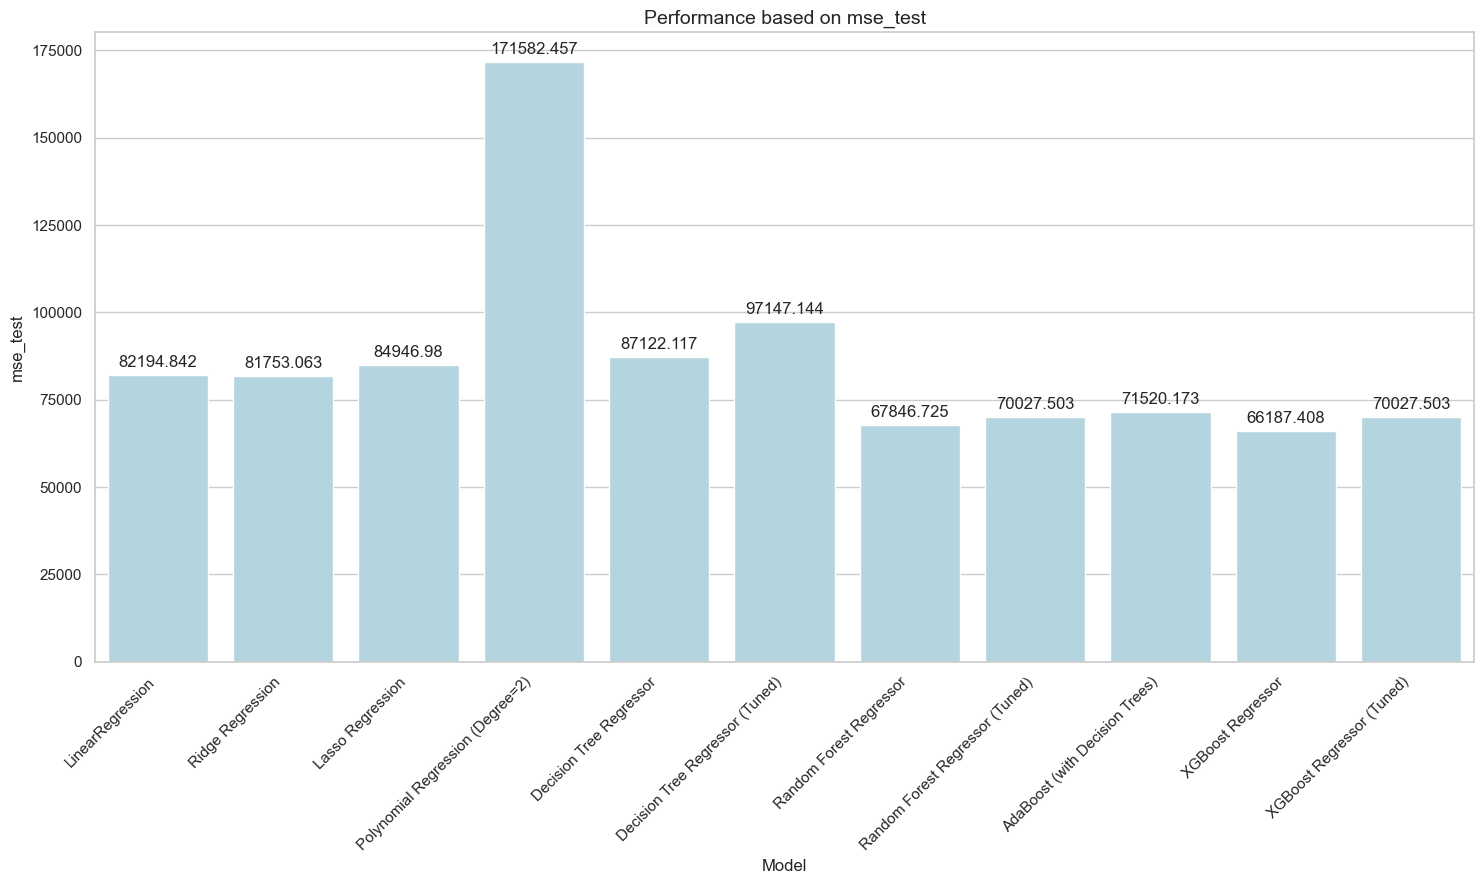

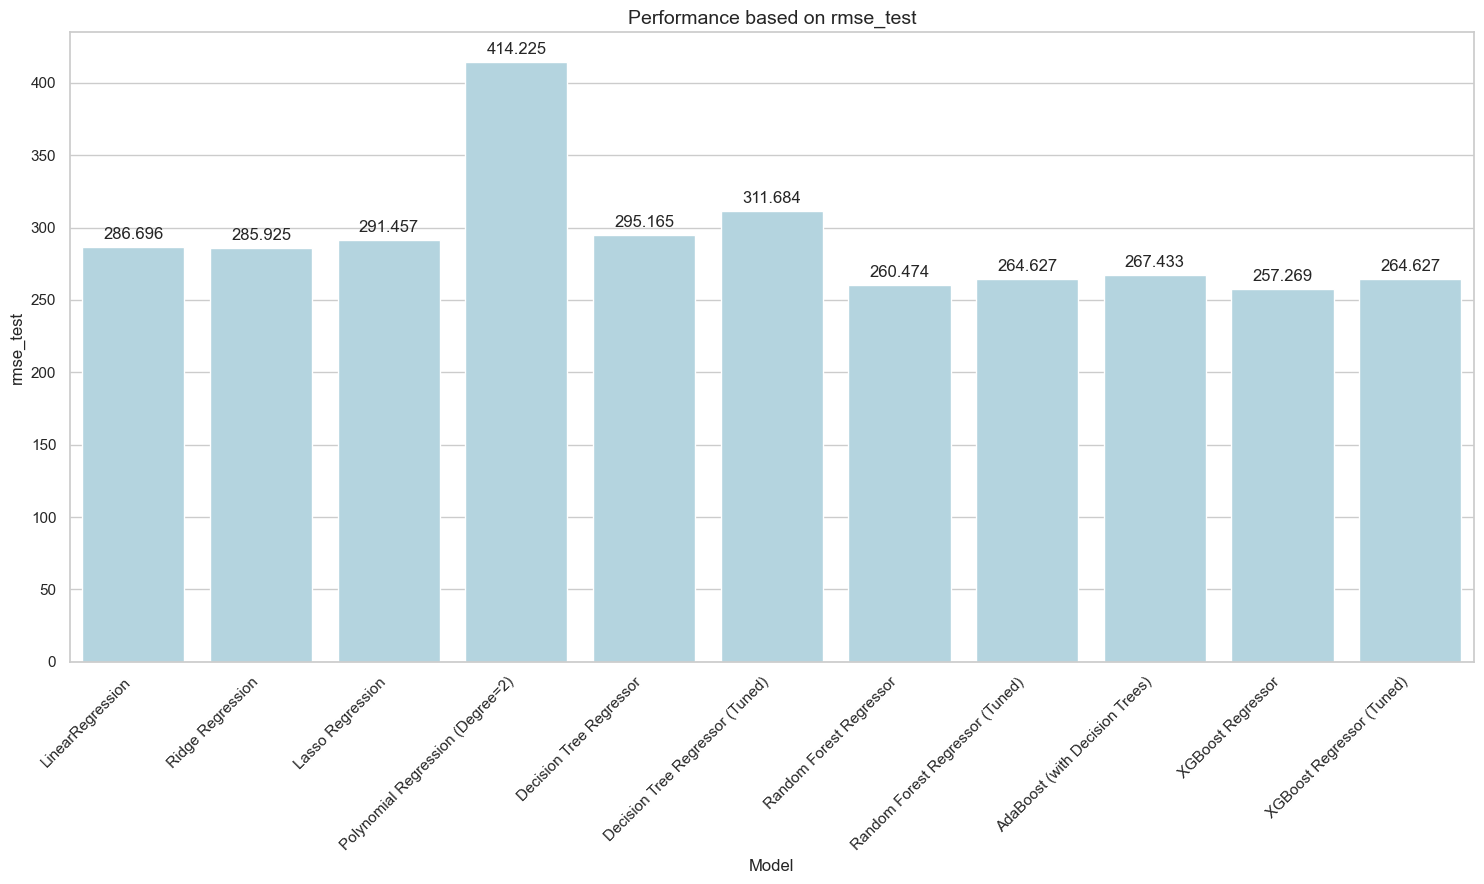

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in results_df.columns:
    if "test" in col:
        plt.figure(figsize=(15,9))
        
        # Create the barplot
        ax = sns.barplot(data=results_df, x="model", y=col, color="lightblue", edgecolor='w')

        # Set labels and title
        ax.set_xlabel("Model", fontsize=12)
        ax.set_ylabel(col, fontsize=12)
        ax.set_title(f"Performance based on {col}", fontsize=14)

        # Annotate bars with the metric values
        for p in ax.patches:
            ax.annotate(format(round(p.get_height(), 3)), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 9), 
                        textcoords='offset points')

        # Rotate x-axis labels for better alignment
        plt.xticks(rotation=45, ha='right')

        # Adjust layout to ensure everything fits
        plt.tight_layout()

        # Show the plot
        plt.show()


## Interptreting Results - Based on Best Model in Test Data

- Recall the mean and median prices in our data (in thousands): 3162R, 3200R, respectively. Since there's a small difference between mean and median, we can regard the data as relatively normal (not skewed)
- All models except Polynomial Regressor achieved greater than 90%. That means, > 90% of the variance in the price data is explained by each of those models. This is an excellent score, as a value close to 100% indicates a very good fit. *Top 2 models by R^2 is XGBoost with 94.6% and Random Forest Regressor at 94.6%*.

- MAE explains the mean difference between actual and predicted values. The lower the value the better the model. The best 2 models by MAE are Decision Trees and Random Forest with MAE=158.5 and MAE=158.7. That means, the average error in predictions is ~159 thousands, which is roughly 5% of the mean price. Another way to put at it is to say that, our model is 159 thousands off in predictions, on average. Given that this figure is relatively small compated to the mean price.

- MSE is the average squared difference between predicted and actual values. Since it squares the differences, it penalizes large errors more than the small ones. RMSE is the square root of MSE. Let's use the RMSE to interpret the results. *Based on RSME, the top 2 models are: XGBoost (257.3) and Random Forest (260.5)*. This means that for XGBoost predictions deviates from the mean by around 257.3 thousands, which is about 8% of the mean price. While this is value is greater than MAE, it is still relatively good given that the outcome may have been skewed by high price values in the data.
